# Dependencies
1. openCV - my version 4.4.0.46 
2. PIMS - my version 0.5
3. Scikitimage - my version 0.16.2
4. trackpy - my version 0.4.2

The usual:
1. Numpy - my version 1.16.4
2. Pandas - my version 1.0.5
3. Matplotlib - my version 3.2.2
4. OS

# 1. Extract images from video
Dark cells on light background

In [1]:
# This takes some time. Took about a minute on my computer with a 1500 frame video. 
# Each frame is saved as a tiff file.
import cv2
vidcap = cv2.VideoCapture('P6.avi')
def getFrame(sec):
    #vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    vidcap.set(cv2.CAP_PROP_FPS, 15.54)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".tiff", image)     # save frame as tiff file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 1/15.54 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

# 2. Measure centroid of the bacterial cell from one image

# 2.1 Opening the 1st frame

In [2]:
import numpy as np
import pandas as pd
import pims
import matplotlib.pyplot as plt

In [3]:
images = pims.open('./*.tiff') #reading all tiff files

In [4]:
images

<Frames>
Source: /home/nkr/Desktop/Phage-delivery-main/*.tiff
Length: 35 frames
Frame Shape: (512, 512, 3)
Pixel Datatype: uint8

In [5]:
print(images[0])  # the first frame

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0  16   0]
  [  0  18   0]
  [  0  28   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0  12   0]
  [  0  40   0]
  [  0  22   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0   7   0]
  [  0  23   0]
  [  0  23   0]]

 ...

 [[  0   4   0]
  [  0   1   0]
  [  0   3   0]
  ...
  [  0   3   0]
  [  0   8   0]
  [  0   0   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   2   0]
  ...
  [  0   4   0]
  [  0   1   0]
  [  0   3   0]]

 [[  0   4   0]
  [  0   1   0]
  [  0   7   0]
  ...
  [  0   3   0]
  [  0   3   0]
  [  0   2   0]]]


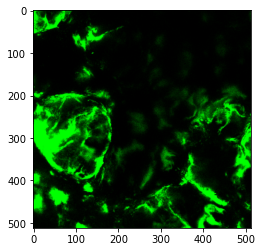

In [6]:
plt.imshow(images[0]) # the first frame
# Can also check other frames . eg. plt.imshow(images[1400])

# 2.2 Determining the correct threshold

In [7]:
from skimage.color import rgb2gray
gs = rgb2gray(images[0])
gs2=gs

In [8]:
gs2 # the number below will help develop an intution of the threshold

array([[0.7154    , 0.7154    , 0.7154    , ..., 0.04488784, 0.05049882,
        0.07855373],
       [0.7154    , 0.7154    , 0.7154    , ..., 0.03366588, 0.11221961,
        0.06172078],
       [0.7154    , 0.7154    , 0.7154    , ..., 0.01963843, 0.06452627,
        0.06452627],
       ...,
       [0.01122196, 0.00280549, 0.00841647, ..., 0.00841647, 0.02244392,
        0.        ],
       [0.00280549, 0.00280549, 0.00561098, ..., 0.01122196, 0.00280549,
        0.00841647],
       [0.01122196, 0.00280549, 0.01963843, ..., 0.00841647, 0.00841647,
        0.00561098]])

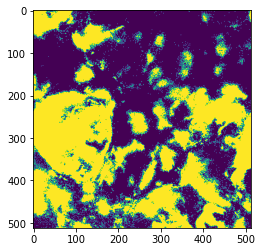

In [9]:
thresh = .03 # Adjust the threshold here
binary = gs2 > thresh
plt.imshow(binary)

# Note: Proceed only if threshold above is good

# 2.3 Measuring the centroid of one frame

In [10]:
from skimage import measure
labels = measure.label(binary)
props = measure.regionprops(labels)
lr =[]
aa2=[]
for prop in props:
    print('Label: {} >> Area: {}'.format(prop.label, prop.area))
    aa = [prop.label,prop.area,prop.centroid,prop.major_axis_length,prop.minor_axis_length]
    aa2 += aa
    lr.append(aa)

Label: 1 >> Area: 4118
Label: 2 >> Area: 1
Label: 3 >> Area: 4
Label: 4 >> Area: 2
Label: 5 >> Area: 2
Label: 6 >> Area: 7
Label: 7 >> Area: 1
Label: 8 >> Area: 1
Label: 9 >> Area: 2
Label: 10 >> Area: 1
Label: 11 >> Area: 1
Label: 12 >> Area: 1
Label: 13 >> Area: 112
Label: 14 >> Area: 1
Label: 15 >> Area: 2
Label: 16 >> Area: 1
Label: 17 >> Area: 1
Label: 18 >> Area: 1
Label: 19 >> Area: 1
Label: 20 >> Area: 1
Label: 21 >> Area: 2
Label: 22 >> Area: 1
Label: 23 >> Area: 1
Label: 24 >> Area: 1
Label: 25 >> Area: 2
Label: 26 >> Area: 1
Label: 27 >> Area: 1
Label: 28 >> Area: 1
Label: 29 >> Area: 1
Label: 30 >> Area: 1
Label: 31 >> Area: 1
Label: 32 >> Area: 1
Label: 33 >> Area: 1
Label: 34 >> Area: 1
Label: 35 >> Area: 1
Label: 36 >> Area: 1
Label: 37 >> Area: 1
Label: 38 >> Area: 1
Label: 39 >> Area: 173
Label: 40 >> Area: 1
Label: 41 >> Area: 1
Label: 42 >> Area: 1
Label: 43 >> Area: 1
Label: 44 >> Area: 1
Label: 45 >> Area: 2
Label: 46 >> Area: 1
Label: 47 >> Area: 2
Label: 48 >> Ar

Label: 421 >> Area: 1
Label: 422 >> Area: 1
Label: 423 >> Area: 1
Label: 424 >> Area: 1
Label: 425 >> Area: 1
Label: 426 >> Area: 1
Label: 427 >> Area: 1
Label: 428 >> Area: 27
Label: 429 >> Area: 2
Label: 430 >> Area: 1
Label: 431 >> Area: 2
Label: 432 >> Area: 1
Label: 433 >> Area: 1
Label: 434 >> Area: 1
Label: 435 >> Area: 1
Label: 436 >> Area: 1
Label: 437 >> Area: 1
Label: 438 >> Area: 1
Label: 439 >> Area: 3
Label: 440 >> Area: 3
Label: 441 >> Area: 1
Label: 442 >> Area: 1
Label: 443 >> Area: 1
Label: 444 >> Area: 1
Label: 445 >> Area: 8
Label: 446 >> Area: 1
Label: 447 >> Area: 1
Label: 448 >> Area: 1
Label: 449 >> Area: 1
Label: 450 >> Area: 2
Label: 451 >> Area: 1
Label: 452 >> Area: 6
Label: 453 >> Area: 1
Label: 454 >> Area: 1
Label: 455 >> Area: 1
Label: 456 >> Area: 1
Label: 457 >> Area: 1
Label: 458 >> Area: 1
Label: 459 >> Area: 1
Label: 460 >> Area: 2
Label: 461 >> Area: 1
Label: 462 >> Area: 1
Label: 463 >> Area: 1
Label: 464 >> Area: 1
Label: 465 >> Area: 1
Label: 46

Label: 822 >> Area: 1
Label: 823 >> Area: 1
Label: 824 >> Area: 1
Label: 825 >> Area: 1
Label: 826 >> Area: 2
Label: 827 >> Area: 1
Label: 828 >> Area: 1
Label: 829 >> Area: 1
Label: 830 >> Area: 4
Label: 831 >> Area: 2
Label: 832 >> Area: 1
Label: 833 >> Area: 1
Label: 834 >> Area: 1
Label: 835 >> Area: 2
Label: 836 >> Area: 1
Label: 837 >> Area: 2
Label: 838 >> Area: 2
Label: 839 >> Area: 1
Label: 840 >> Area: 1
Label: 841 >> Area: 407
Label: 842 >> Area: 1
Label: 843 >> Area: 1
Label: 844 >> Area: 1
Label: 845 >> Area: 1
Label: 846 >> Area: 1
Label: 847 >> Area: 1
Label: 848 >> Area: 1
Label: 849 >> Area: 1
Label: 850 >> Area: 6
Label: 851 >> Area: 1
Label: 852 >> Area: 2
Label: 853 >> Area: 1
Label: 854 >> Area: 3
Label: 855 >> Area: 1
Label: 856 >> Area: 1
Label: 857 >> Area: 1
Label: 858 >> Area: 2
Label: 859 >> Area: 1
Label: 860 >> Area: 1
Label: 861 >> Area: 1
Label: 862 >> Area: 1
Label: 863 >> Area: 1
Label: 864 >> Area: 2
Label: 865 >> Area: 1
Label: 866 >> Area: 1
Label: 8

Label: 1302 >> Area: 2
Label: 1303 >> Area: 3
Label: 1304 >> Area: 1
Label: 1305 >> Area: 1
Label: 1306 >> Area: 1
Label: 1307 >> Area: 1
Label: 1308 >> Area: 1
Label: 1309 >> Area: 2
Label: 1310 >> Area: 1
Label: 1311 >> Area: 1
Label: 1312 >> Area: 1
Label: 1313 >> Area: 2
Label: 1314 >> Area: 1
Label: 1315 >> Area: 1
Label: 1316 >> Area: 1
Label: 1317 >> Area: 1
Label: 1318 >> Area: 1
Label: 1319 >> Area: 1
Label: 1320 >> Area: 1
Label: 1321 >> Area: 1
Label: 1322 >> Area: 4
Label: 1323 >> Area: 1
Label: 1324 >> Area: 4
Label: 1325 >> Area: 1
Label: 1326 >> Area: 1
Label: 1327 >> Area: 1
Label: 1328 >> Area: 1
Label: 1329 >> Area: 1
Label: 1330 >> Area: 1
Label: 1331 >> Area: 1
Label: 1332 >> Area: 2
Label: 1333 >> Area: 1
Label: 1334 >> Area: 1
Label: 1335 >> Area: 1
Label: 1336 >> Area: 2
Label: 1337 >> Area: 4
Label: 1338 >> Area: 1
Label: 1339 >> Area: 1
Label: 1340 >> Area: 1
Label: 1341 >> Area: 2
Label: 1342 >> Area: 1
Label: 1343 >> Area: 2
Label: 1344 >> Area: 1
Label: 1345

Label: 1879 >> Area: 1
Label: 1880 >> Area: 1
Label: 1881 >> Area: 1
Label: 1882 >> Area: 1
Label: 1883 >> Area: 1
Label: 1884 >> Area: 2
Label: 1885 >> Area: 1
Label: 1886 >> Area: 1
Label: 1887 >> Area: 1
Label: 1888 >> Area: 2
Label: 1889 >> Area: 2
Label: 1890 >> Area: 1
Label: 1891 >> Area: 2
Label: 1892 >> Area: 1
Label: 1893 >> Area: 1
Label: 1894 >> Area: 1
Label: 1895 >> Area: 1
Label: 1896 >> Area: 1
Label: 1897 >> Area: 1
Label: 1898 >> Area: 1
Label: 1899 >> Area: 2
Label: 1900 >> Area: 1
Label: 1901 >> Area: 1
Label: 1902 >> Area: 13
Label: 1903 >> Area: 1
Label: 1904 >> Area: 1
Label: 1905 >> Area: 1
Label: 1906 >> Area: 1
Label: 1907 >> Area: 2
Label: 1908 >> Area: 1
Label: 1909 >> Area: 3
Label: 1910 >> Area: 3
Label: 1911 >> Area: 1
Label: 1912 >> Area: 1
Label: 1913 >> Area: 10
Label: 1914 >> Area: 7
Label: 1915 >> Area: 5
Label: 1916 >> Area: 11
Label: 1917 >> Area: 1
Label: 1918 >> Area: 1
Label: 1919 >> Area: 1
Label: 1920 >> Area: 1
Label: 1921 >> Area: 1
Label: 1

Label: 2397 >> Area: 1
Label: 2398 >> Area: 1
Label: 2399 >> Area: 77
Label: 2400 >> Area: 1
Label: 2401 >> Area: 2
Label: 2402 >> Area: 1
Label: 2403 >> Area: 3
Label: 2404 >> Area: 2
Label: 2405 >> Area: 2
Label: 2406 >> Area: 2
Label: 2407 >> Area: 1
Label: 2408 >> Area: 1
Label: 2409 >> Area: 1
Label: 2410 >> Area: 4
Label: 2411 >> Area: 5
Label: 2412 >> Area: 3
Label: 2413 >> Area: 2
Label: 2414 >> Area: 5
Label: 2415 >> Area: 6
Label: 2416 >> Area: 1
Label: 2417 >> Area: 4
Label: 2418 >> Area: 1
Label: 2419 >> Area: 1
Label: 2420 >> Area: 8
Label: 2421 >> Area: 2
Label: 2422 >> Area: 1
Label: 2423 >> Area: 1
Label: 2424 >> Area: 2
Label: 2425 >> Area: 3
Label: 2426 >> Area: 1
Label: 2427 >> Area: 7
Label: 2428 >> Area: 2
Label: 2429 >> Area: 1
Label: 2430 >> Area: 1
Label: 2431 >> Area: 1
Label: 2432 >> Area: 11
Label: 2433 >> Area: 1
Label: 2434 >> Area: 1
Label: 2435 >> Area: 1
Label: 2436 >> Area: 2
Label: 2437 >> Area: 1
Label: 2438 >> Area: 1
Label: 2439 >> Area: 1
Label: 24

Decide the area threshold based on the numbers above

In [11]:
from pandas import DataFrame
Outprops = DataFrame (lr,columns=['Cell#_arbit','Area','Centroid','Majoraxis','Minoraxis'])
Outprops

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,4118,"(25.020155415250123, 39.0264691597863)",109.328025,57.776466
1,2,1,"(0.0, 33.0)",0.000000,0.000000
2,3,4,"(0.5, 39.75)",3.395752,1.862491
3,4,2,"(0.5, 95.5)",2.828427,0.000000
4,5,2,"(0.5, 98.0)",2.000000,0.000000
...,...,...,...,...,...
2743,2744,1,"(511.0, 218.0)",0.000000,0.000000
2744,2745,1,"(511.0, 230.0)",0.000000,0.000000
2745,2746,1,"(511.0, 241.0)",0.000000,0.000000
2746,2747,1,"(511.0, 269.0)",0.000000,0.000000


In [12]:
# Apply area filer here
at = 2
at1 = 35
df2 = Outprops[~(Outprops['Area'] <= at)]
df3 = df2[~(df2['Area'] >= at1)]
df3

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
2,3,4,"(0.5, 39.75)",3.395752,1.862491
5,6,7,"(1.1428571428571428, 101.57142857142857)",4.915614,2.138090
50,51,4,"(9.5, 414.5)",4.472136,2.000000
51,52,5,"(10.8, 97.4)",3.321307,2.858132
52,53,9,"(12.11111111111111, 100.66666666666667)",5.865468,2.507517
...,...,...,...,...,...
2713,2714,8,"(509.5, 181.75)",3.872983,3.464102
2719,2720,5,"(510.2, 200.2)",3.836665,1.788854
2726,2727,5,"(510.6, 86.0)",5.656854,1.959592
2727,2728,4,"(510.5, 141.5)",4.472136,2.000000


### Is the result of the cell below similar to the number of cells that you can manually count in the image below? If yes, all is good. You can proceed with the for loop.

Number of cells =  381


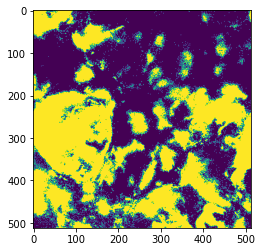

In [13]:
ncells = df3.shape[0]
print('Number of cells = ', ncells)
plt.imshow(binary)

# 3. Use for loop and measure centroid from all images (frames)

In [14]:
# This loop will take some time. For 1500 frames, ~10 cell/frame, it took 1.5 minutes
frame = 0
Outprops2 = pd.DataFrame([])

for image in images:
    gs1 = rgb2gray(image)
    gs2_1=gs1
    binary1 = gs2_1 > thresh
    labels = measure.label(binary1)
    props = measure.regionprops(labels)
    
    lr1 =[]
    frame = frame + 1 
    for prop in props:
        #print('Label: {} >> Area: {}'.format(prop.label, prop.area))
        centroid = [prop.centroid]
        cpx = centroid[0][0]
        
        cpy = centroid[0][1]
        aa1 = [prop.area,cpx,cpy,prop.major_axis_length,prop.minor_axis_length,frame]
        lr1.append(aa1)
        
    
    Outprops1 = DataFrame(lr1,columns=['mass','x','y','Majoraxis','Minoraxis','frame'])    
    # Apply area filer here
    
    Outprops2 = Outprops2.append(Outprops1)
    df3 = Outprops2[~(Outprops2['mass'] <= at)]  # this is the area filter to remove noise
    

# 4. Plot the Centroid for all frames

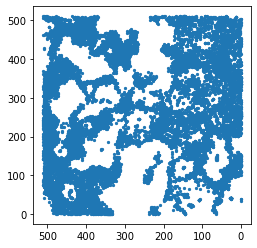

In [15]:
plt.scatter(df3['x'],df3['y'],s=5)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal', adjustable='box')

# 4.1 Time as colormap

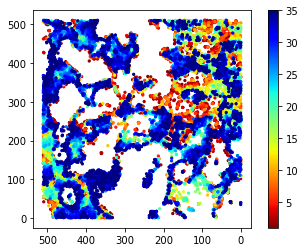

In [16]:
plt.scatter(df3['x'],df3['y'], s=5, c=df3['frame'], cmap="jet_r")
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

Exercise: Use time rather than nFrames for colormap. 
What is the frame rate?

# 5. Extra: Delete all tiff images (if needed)

In [17]:
import os
cwd = os.getcwd()
import os

dir_name = cwd
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".tiff"):
        os.remove(os.path.join(dir_name, item))

# 6. Implementing Trackpy for joining the tracks and filtering

In [18]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))

mpl.rc('image', cmap='gray')

from pandas import DataFrame, Series  # for convenience

import trackpy as tp

# 6.1 Link features into particle trajectories
We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.
First, we must must specify a maximum displacement, the farthest a particle can travel between frames. We should choose the smallest reasonable value because a large value slows computation time considerably. In this case, 20 pixels is reasonable.
Second, we allow for the possibility that a particle might be missed for a few frames and then seen again. (Perhaps its "mass" slipped below our cutoff due to noise in the video.) Memory keeps track of disappeared particles and maintains their ID for up to some number of frames after their last appearance. Here we use 4 frames.

In [21]:
# tp.quiet()  # Turn off progress reports for best performance
t = tp.link(df3, 3, memory=10)

Frame 35: 770 trajectories present.


The result is the features DataFrame with an additional column, particle, identifying each feature with a label. We denote this new DataFrame t.

In [22]:
#t

# 6.2  Filter spurious trajectories
We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [29]:
t1 = tp.filter_stubs(t, 15)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 6590
After: 32


In [30]:
#t1

We can also filter trajectories by their particles' appearance. At this stage, with trajectories linked, we can look at a feature's "average appearance" throughout its trajectory, giving a more accurate picture.

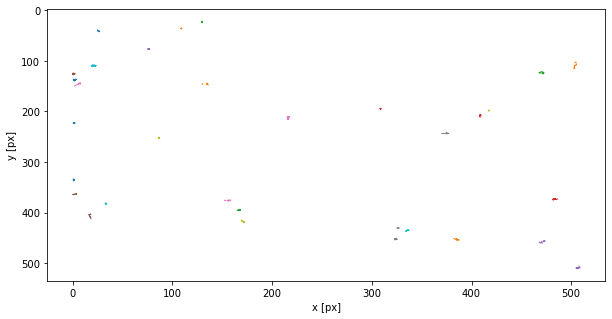

In [31]:
plt.figure()
tp.plot_traj(t1);

# 6.3 Remove overall drift
Compute the overall drifting motion, which we will subtract away, adopting the reference frame of the particles' average position.

In [32]:
d = tp.compute_drift(t1)

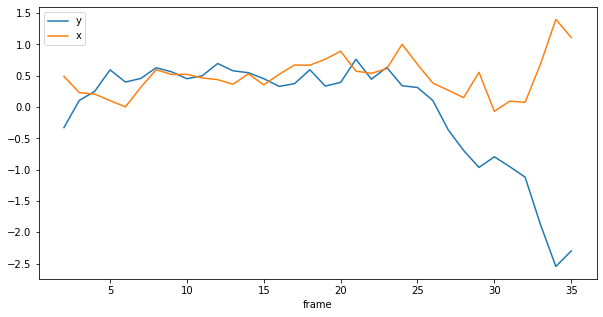

In [33]:
d.plot()
plt.show()

In [34]:
tm = tp.subtract_drift(t1.copy(), d)

With the overall drifting motion subtracted out, we plot the trajectories again.

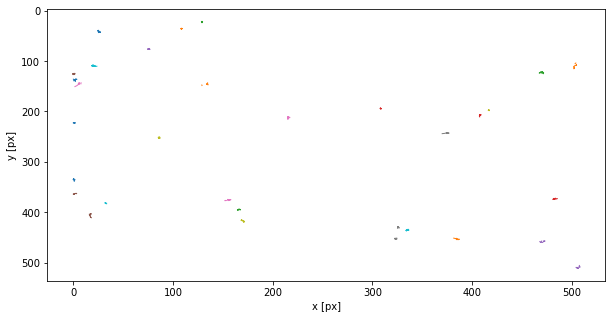

In [35]:
ax = tp.plot_traj(tm)
plt.show()

In [36]:
#print(tm)

In [37]:
tm1=pd.DataFrame(data=tm, columns=['x', 'y', 'frame','particle'])

In [38]:
tm1.columns = ['x', 'y','frameN','particle']

In [39]:
tm2=tm1.sort_values(by=['particle','frameN'], ascending=True)

In [40]:
#d.set_option('display.max_rows', None)
print(tm2)


                x           y  frameN  particle
frame                                          
1       25.020155   39.026469       1         0
2       24.528268   40.114657       2         0
3       24.979157   39.532635       3         0
4       24.927969   40.544945       4         0
5       25.141477   40.297019       5         0
...           ...         ...     ...       ...
27     504.928731  108.178947      27      2957
28     504.776887  108.448381      28      2957
29     504.740860  106.850380      29      2957
32     503.424246  105.119837      32      2957
33     504.148769  103.876376      33      2957

[590 rows x 4 columns]


In [41]:
q=tm2.particle.unique()

In [42]:
q

array([   0,   88,  167,  180,  200,  278,  325,  454,  576,  584,  595,
        631,  649,  710,  967, 1010, 1014, 1094, 1139, 1246, 1356, 1408,
       1558, 1651, 1846, 1864, 1889, 1942, 2029, 2333, 2523, 2957])

#### X and Y on the plot are labelled other way around as the dataframe we are using here has the axis interchanged with respect to the initial video input. please make sure that there are no noises in the plot below before continuing with saving xy coordinates as a .csv. for removing any noise from the plot go back and play with the parameters.

(-3.29871060554942, 535.9972911302623, 533.7287257386819, -26.054862988960934)

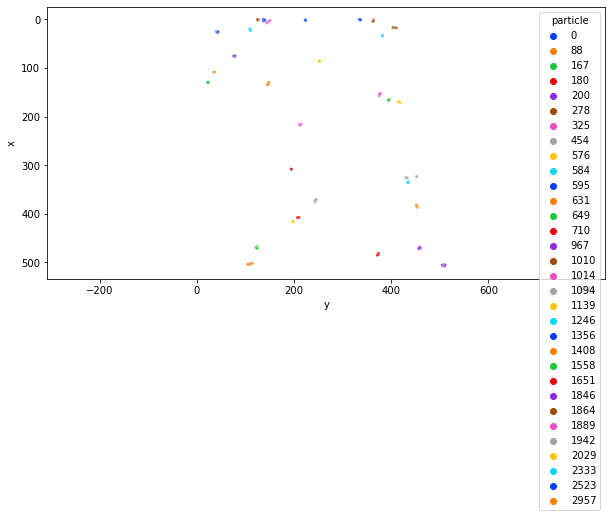

In [43]:
import seaborn as sns
sns.scatterplot(data=tm2, x="y",y="x", hue="particle", palette="bright", s=5)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.axis('equal')

In [44]:
tm2.to_csv('10.csv') 

# Instantaneous speed Calculation.
make sure to change pixels to micron and 1/frames per second

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 221.6950158] [loc=0.198 scale=0.136]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


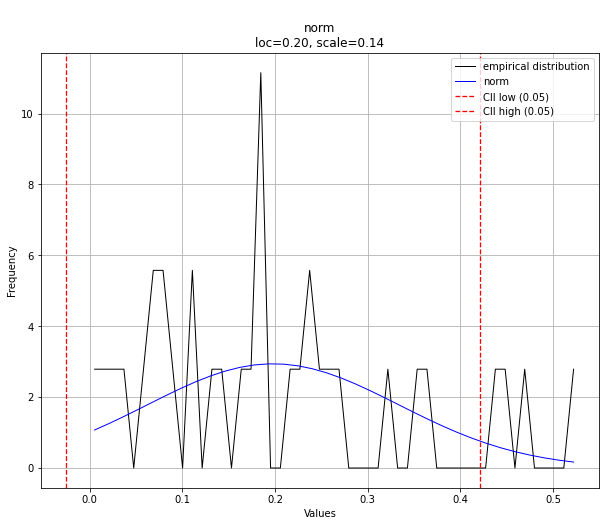

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 268.1602435] [loc=0.353 scale=0.247]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


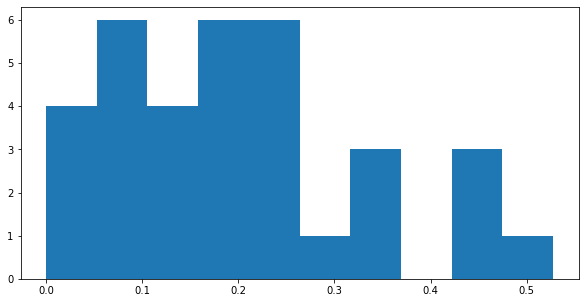

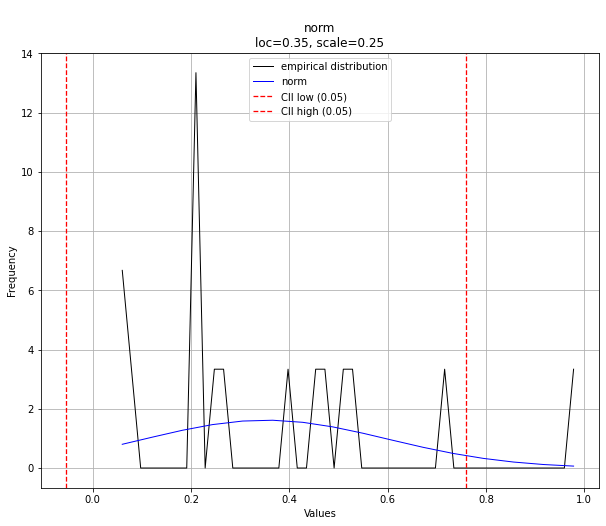

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 369.3804012] [loc=0.540 scale=0.264]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


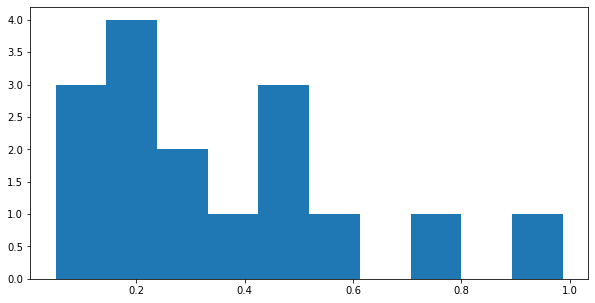

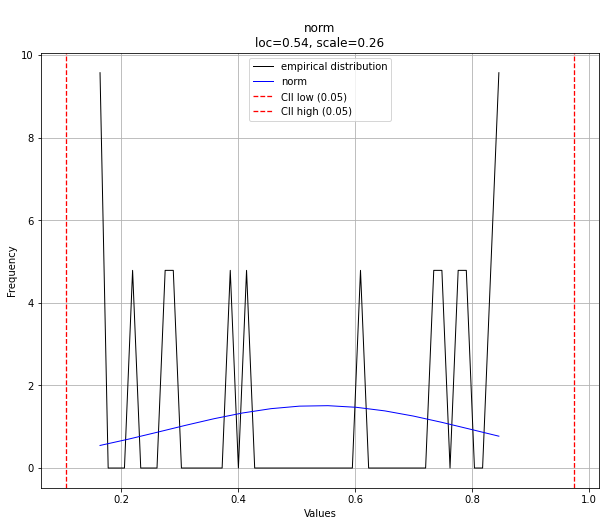

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 277.1978419] [loc=0.365 scale=0.257]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


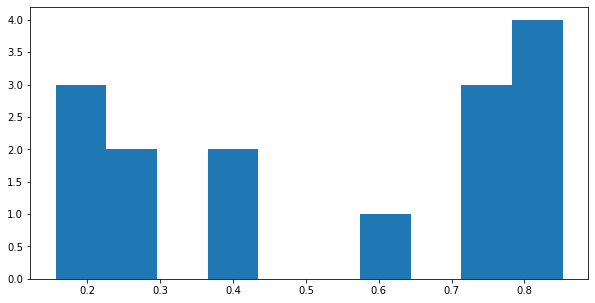

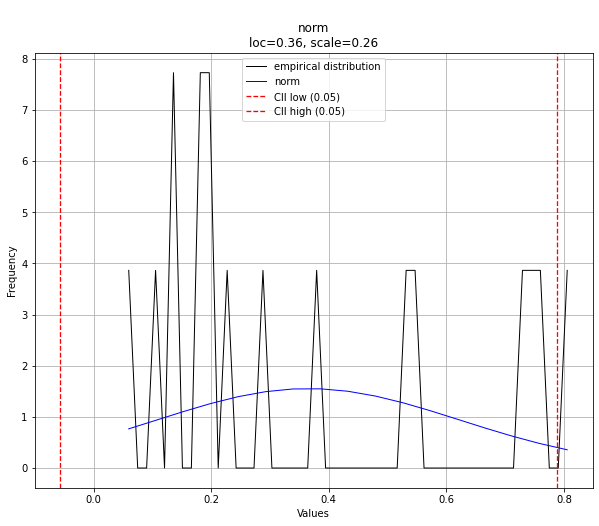

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 213.1770390] [loc=0.387 scale=0.224]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


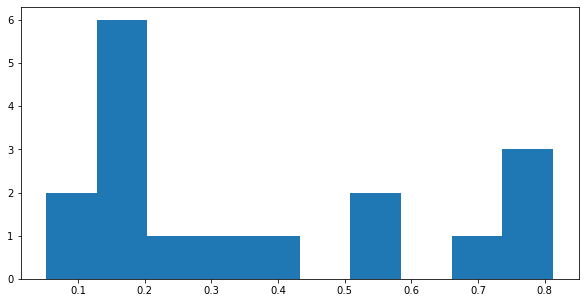

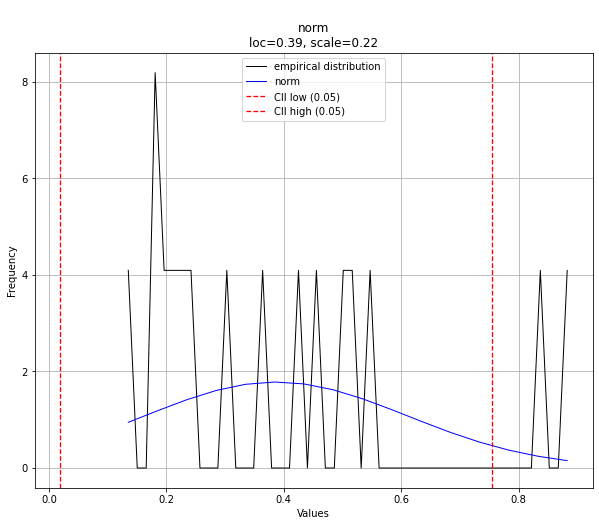

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 140.0909342] [loc=0.459 scale=0.291]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


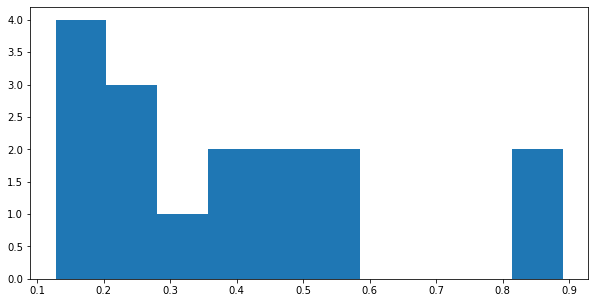

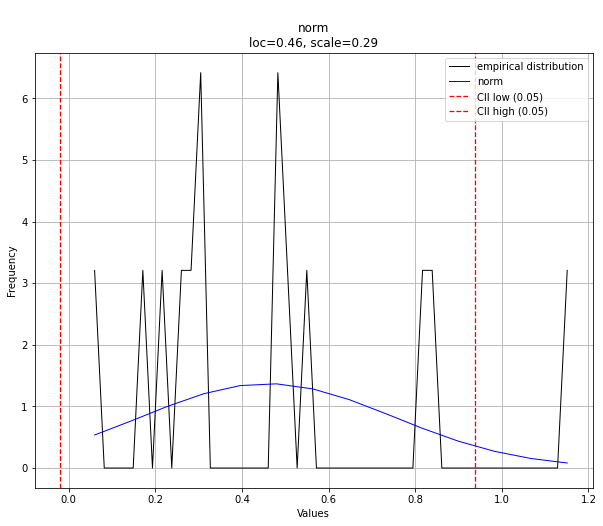

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 136.3716117] [loc=0.302 scale=0.193]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


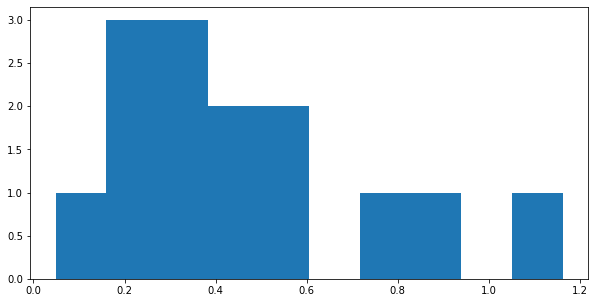

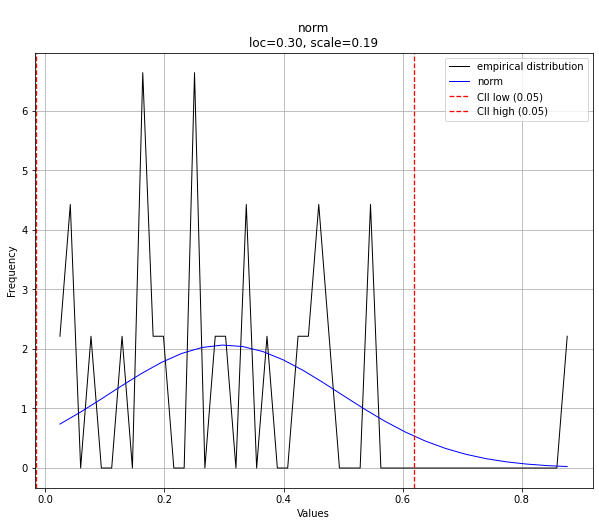

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 181.9397478] [loc=0.282 scale=0.190]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


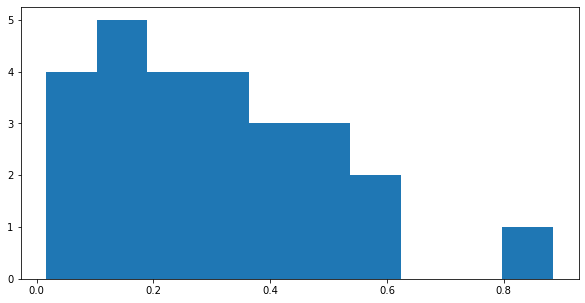

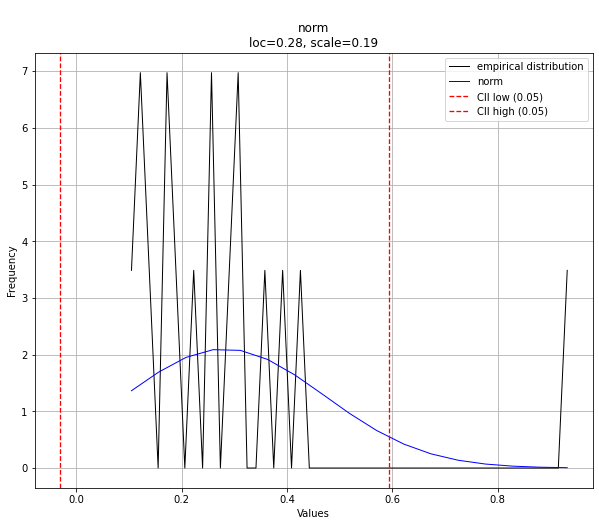

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 345.3156089] [loc=0.458 scale=0.254]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


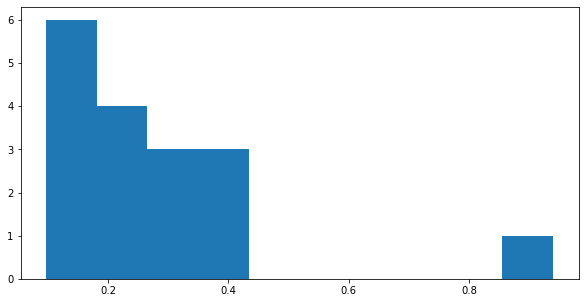

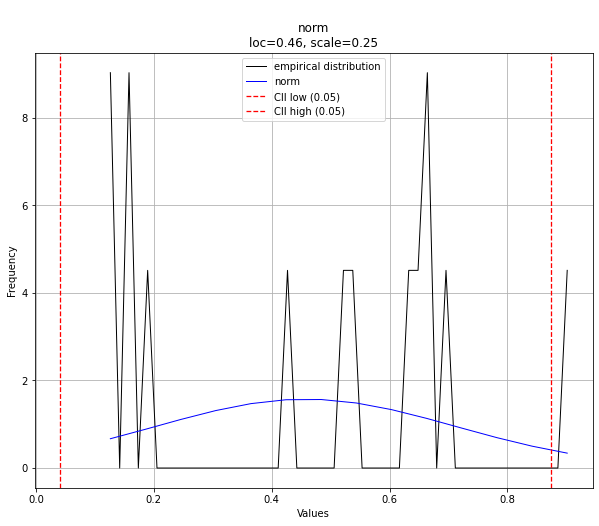

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 208.0549085] [loc=0.379 scale=0.245]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


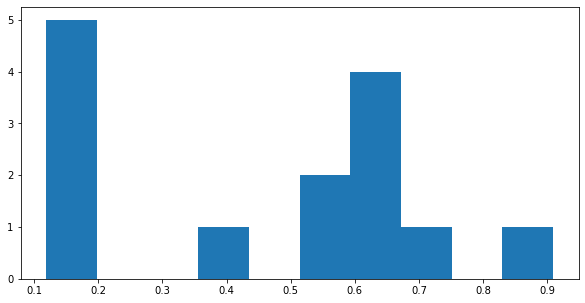

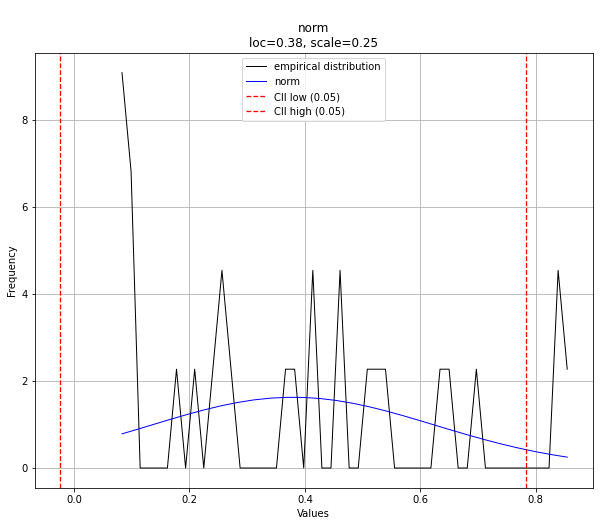

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 148.4041615] [loc=0.398 scale=0.244]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


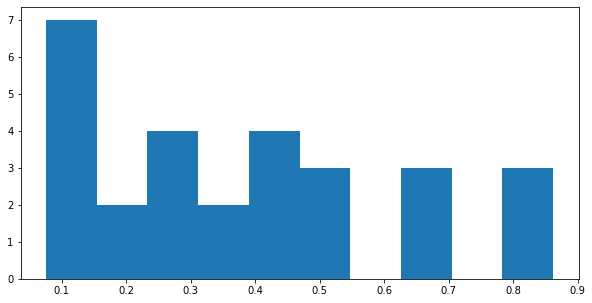

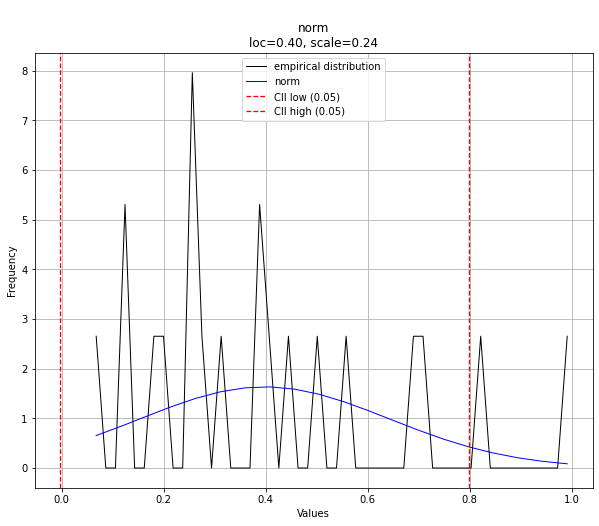

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 442.6096516] [loc=0.267 scale=0.151]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


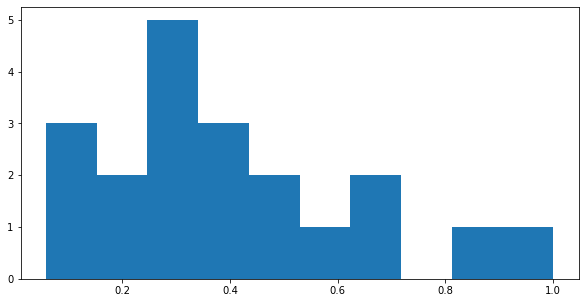

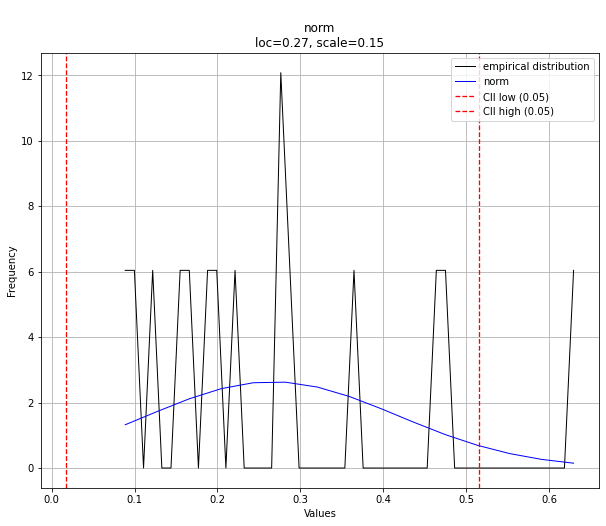

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 311.2260126] [loc=0.253 scale=0.166]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


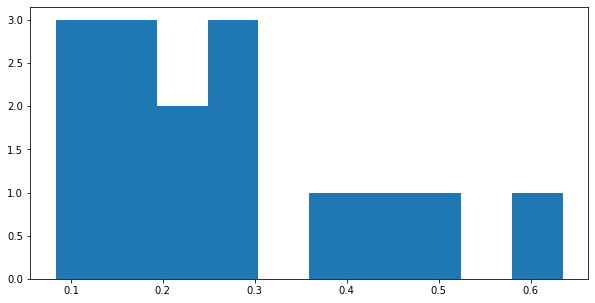

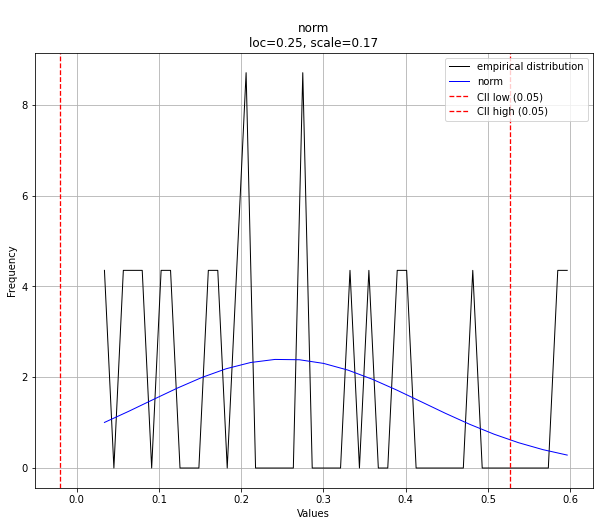

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 498.3429673] [loc=0.299 scale=0.198]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


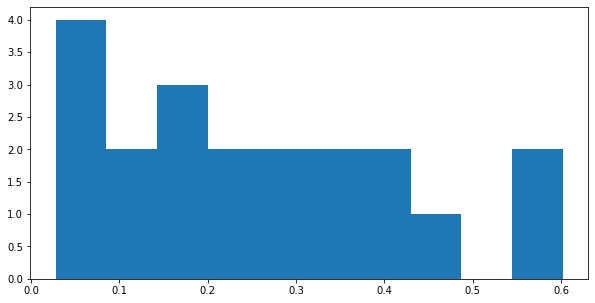

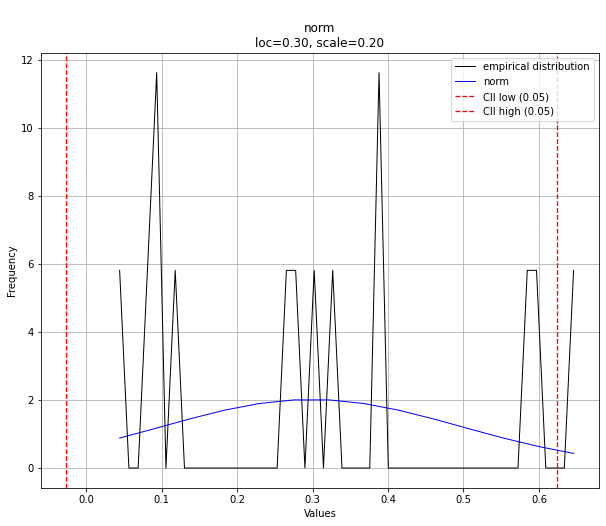

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 171.8453533] [loc=0.454 scale=0.301]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


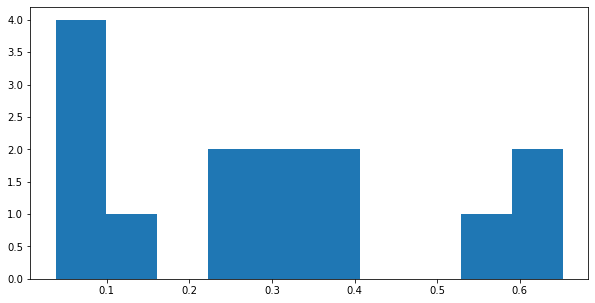

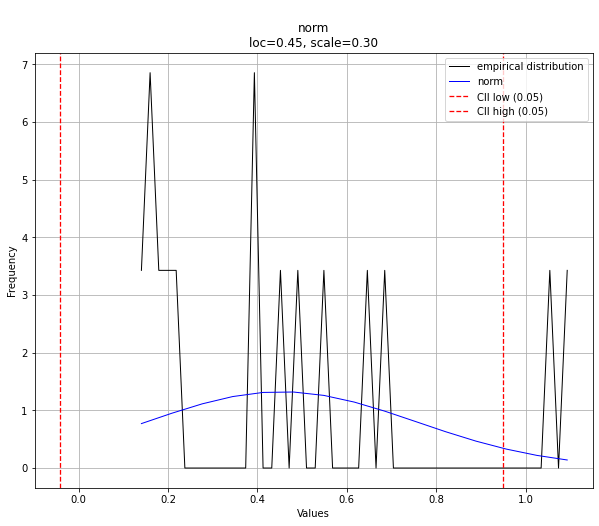

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 502.4686771] [loc=0.251 scale=0.151]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


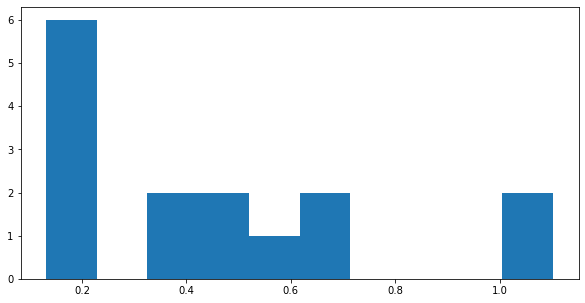

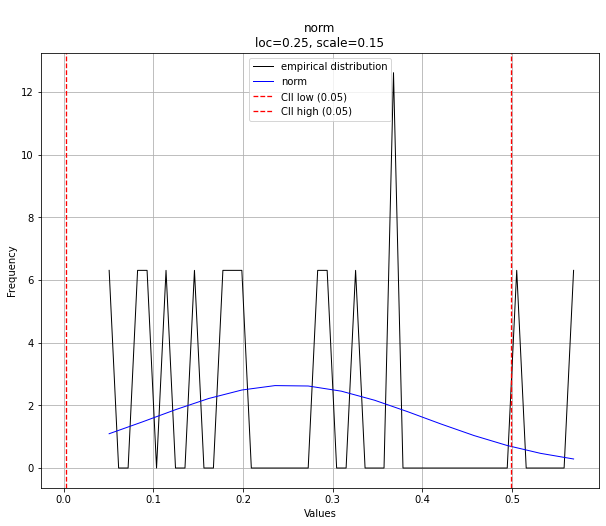

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 88.8734930] [loc=0.424 scale=0.341]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


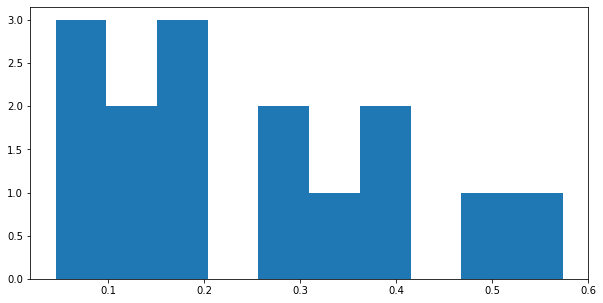

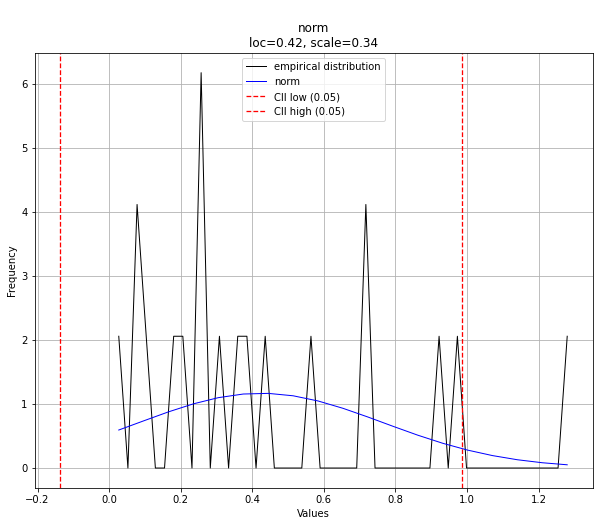

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 87.7183301] [loc=0.391 scale=0.276]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


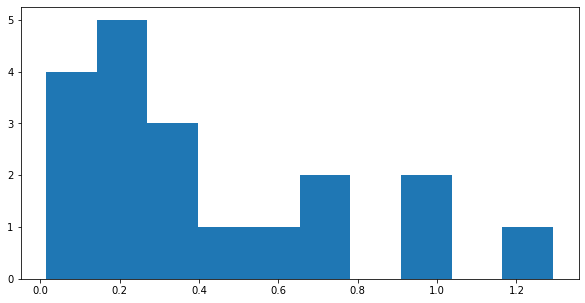

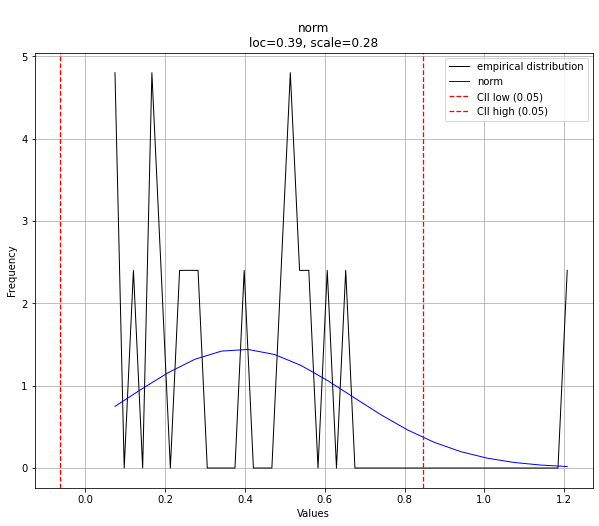

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 679.0852173] [loc=0.250 scale=0.122]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


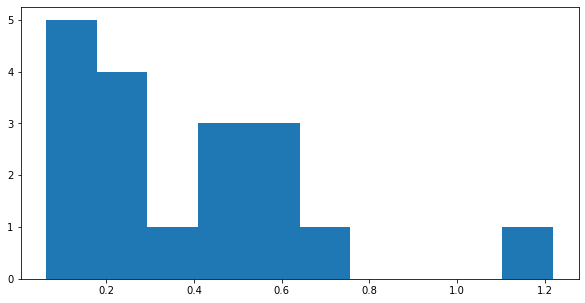

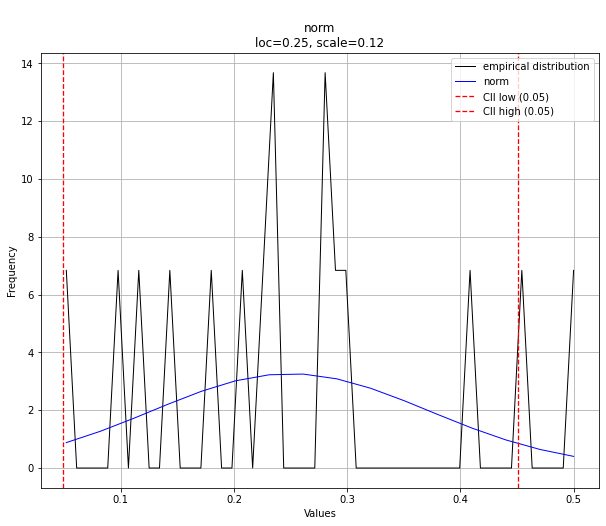

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 323.2669680] [loc=0.399 scale=0.264]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


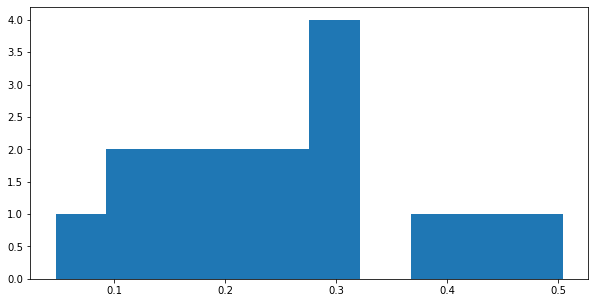

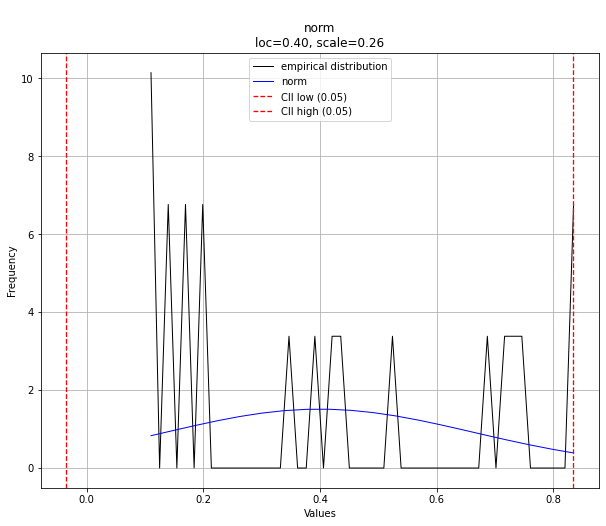

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 573.1506677] [loc=0.193 scale=0.140]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


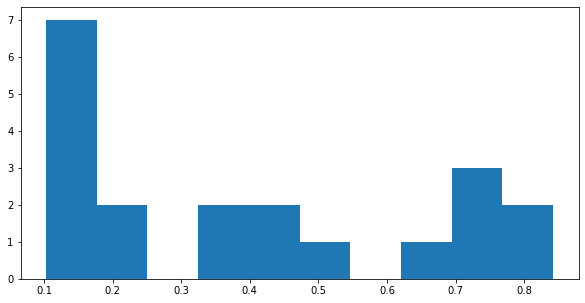

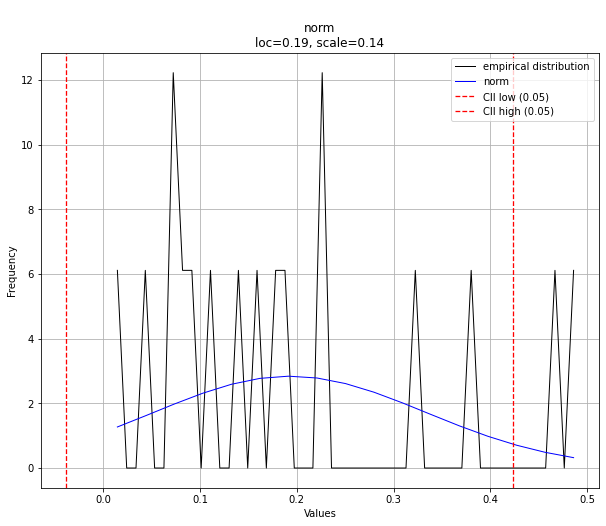

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 208.4144449] [loc=0.440 scale=0.259]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


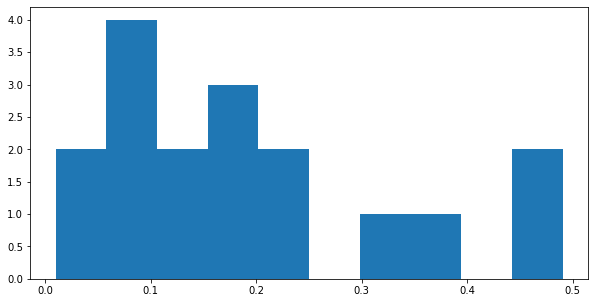

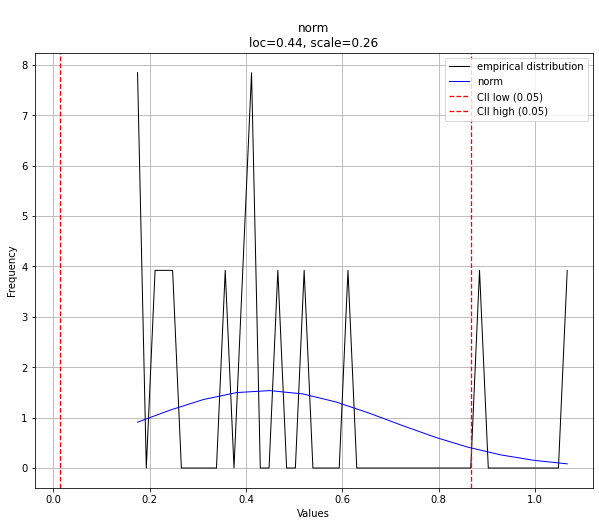

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 121.7833454] [loc=0.320 scale=0.286]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


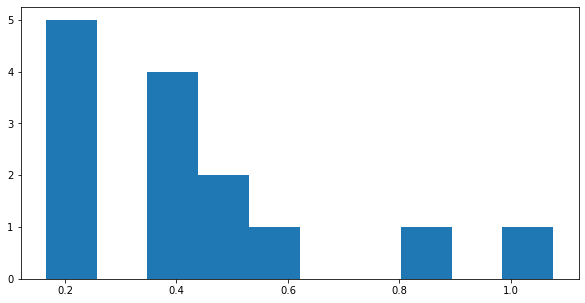

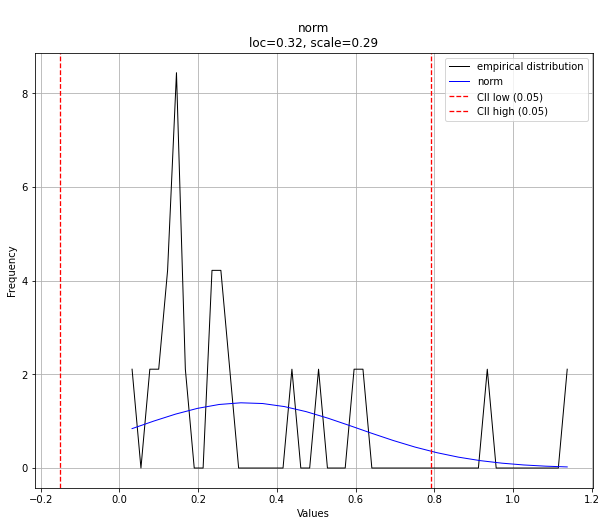

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 474.9843576] [loc=0.348 scale=0.175]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


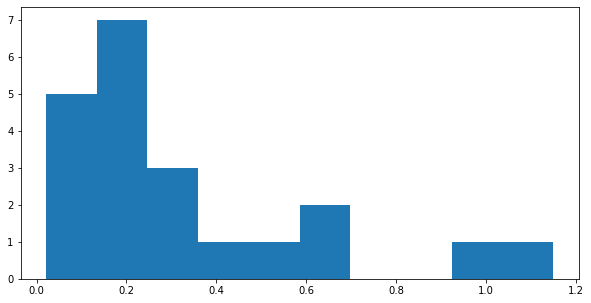

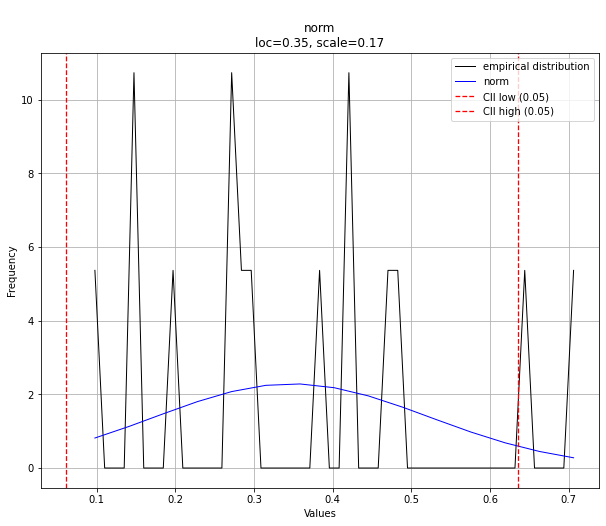

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 195.0703872] [loc=0.327 scale=0.214]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


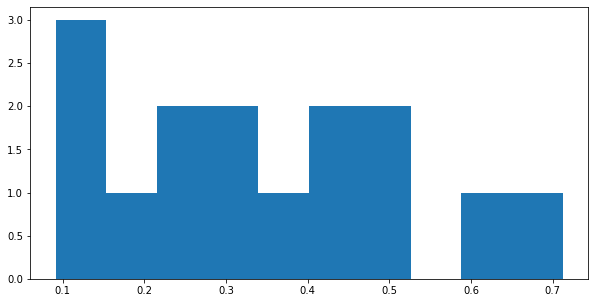

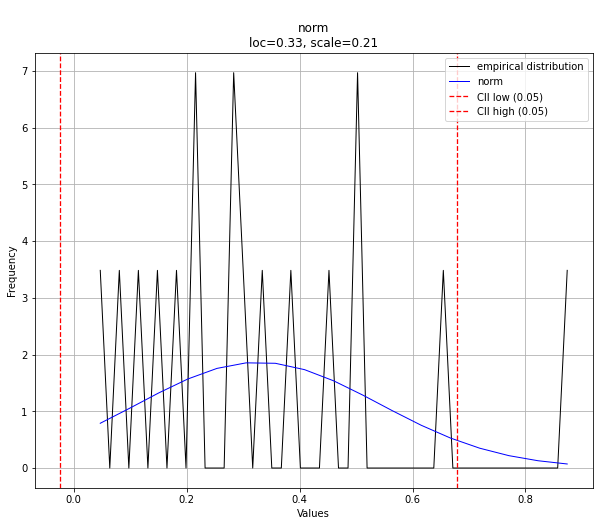

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 307.7650491] [loc=0.378 scale=0.219]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


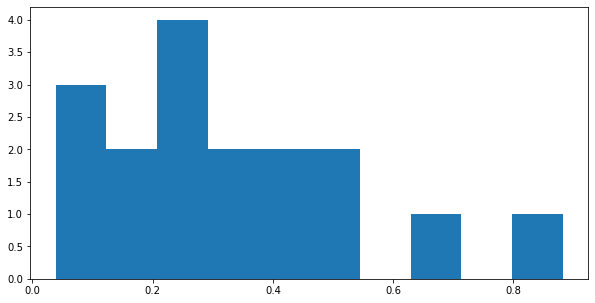

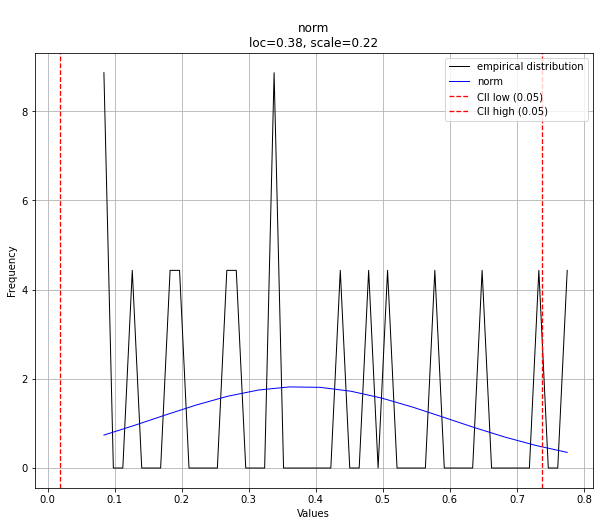

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 151.0103055] [loc=0.403 scale=0.251]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


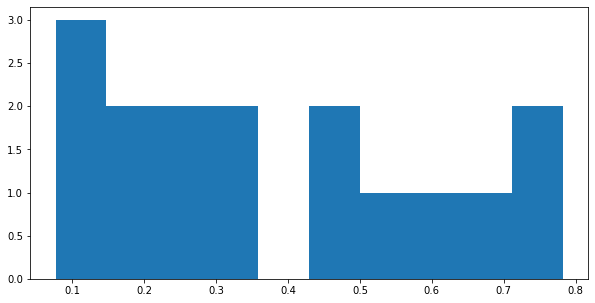

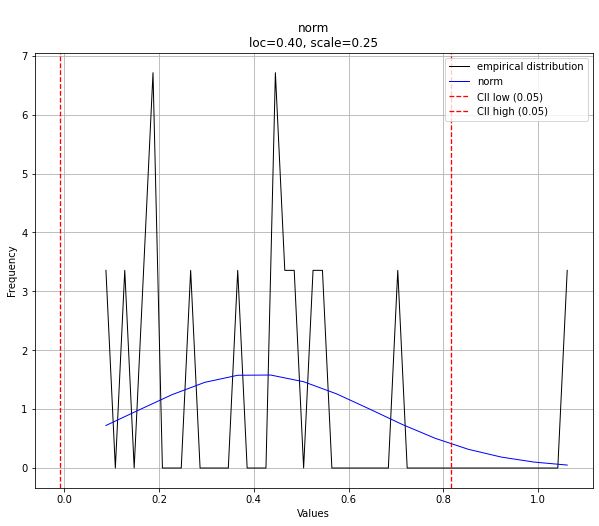

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 599.1029741] [loc=0.376 scale=0.148]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


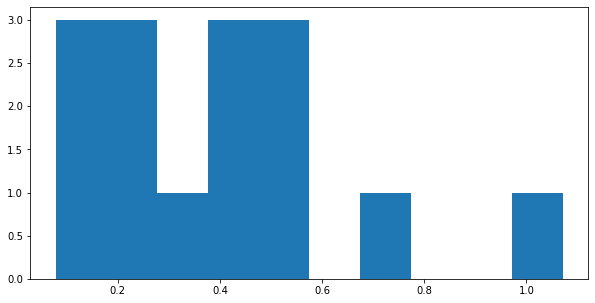

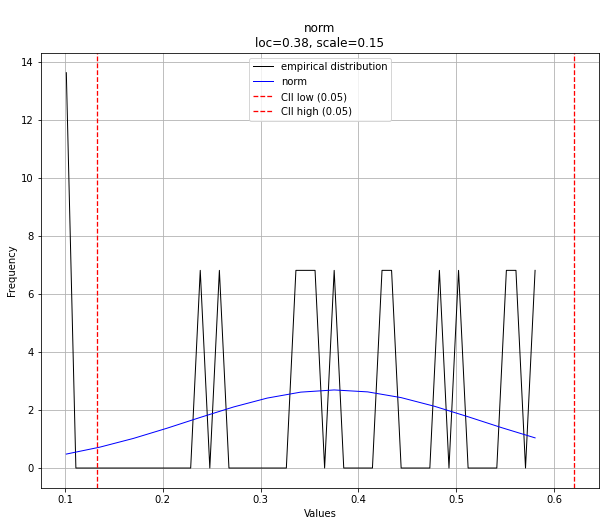

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 229.5358769] [loc=0.475 scale=0.236]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


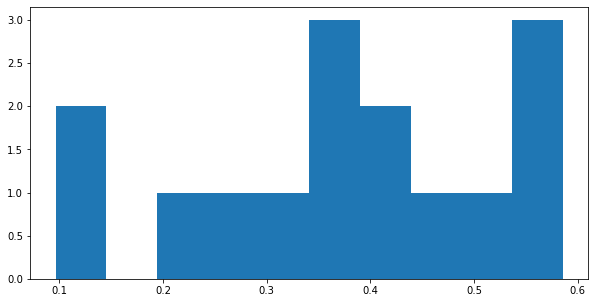

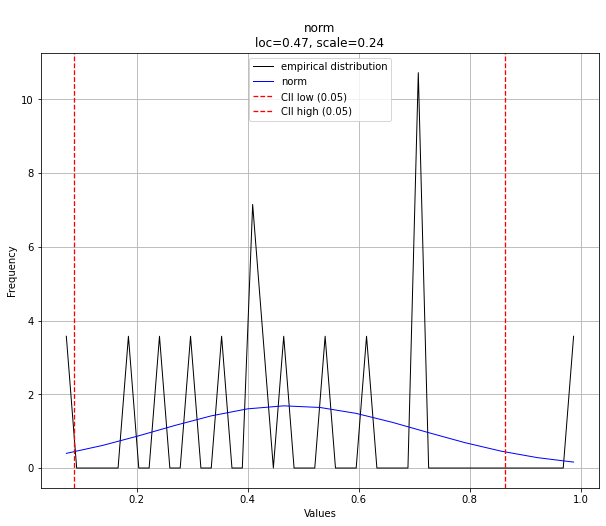

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 136.5459432] [loc=0.313 scale=0.312]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


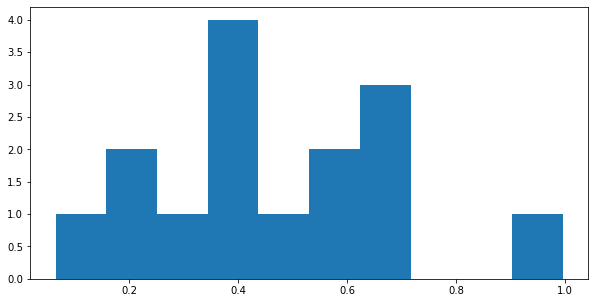

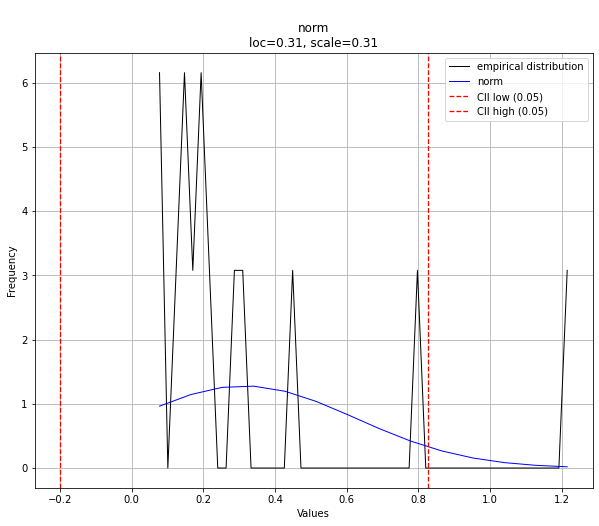

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 559.6805547] [loc=0.374 scale=0.171]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


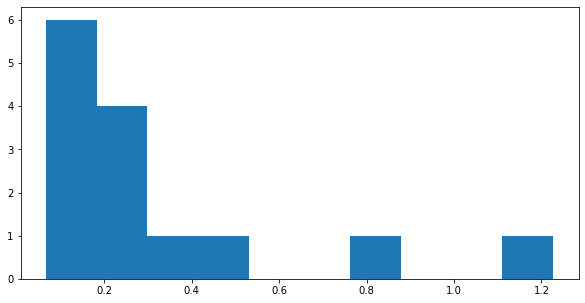

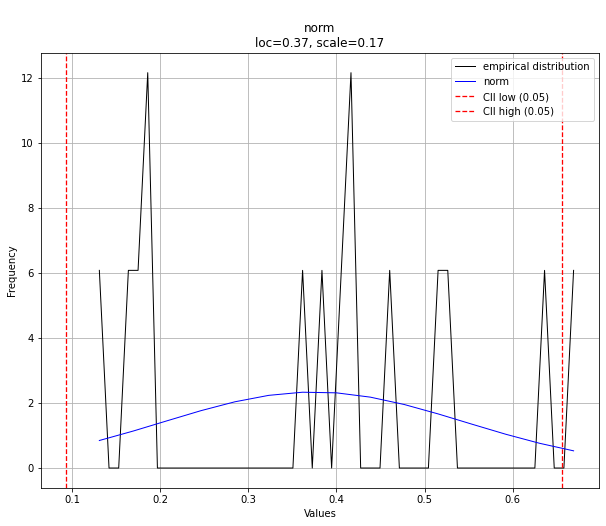

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 232.8412167] [loc=0.425 scale=0.302]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


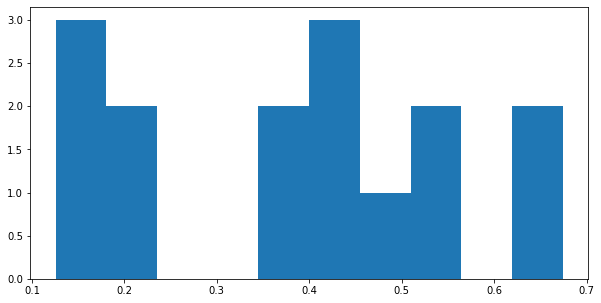

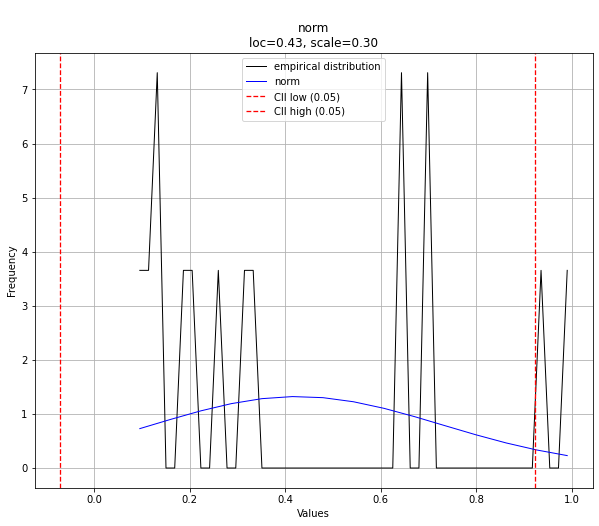

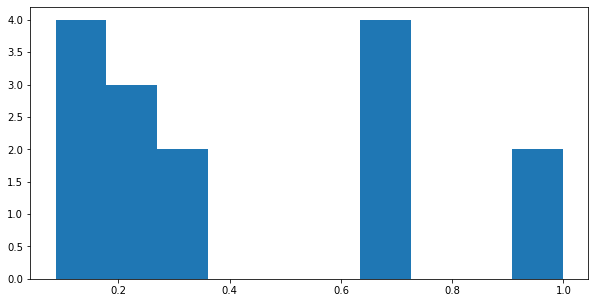

In [45]:
mu=[]
r=[]
r1=[]
for ii in q:
    track=tm2.loc[tm2.particle==ii, ['frameN', 'x','y','particle']]
    x=track["x"]
    x1=np.diff(x)
    y=track["y"]
    y1=np.diff(y)
    
    dist=np.sqrt((x1)**2 + (y1)**2)
    dist=dist * 0.14    #(change pixel to micron)
    
    time=track["frameN"]
    time=np.diff(time)
    time =(time*0.317) #(change 1/frames per second)
    
    speed =(dist/time)
    
    
    
    
    from distfit import distfit
    speed2 = distfit(distr='norm')
    speed2.fit_transform(speed)
    speed2.plot()
    mu2=speed2.model['loc']
    mu +=[mu2]
    plt.figure()
    plt.hist(speed)
  


In [46]:
mu=np.array(mu)

In [47]:
#mu = mu[(mu >= 0) & (mu <= 3)]

In [48]:
mu

array([0.19786436, 0.35273525, 0.53962872, 0.3649104 , 0.38678986,
       0.4587928 , 0.30151359, 0.2815367 , 0.45776777, 0.37942501,
       0.39784247, 0.26651975, 0.25317781, 0.29852947, 0.4537623 ,
       0.25101816, 0.42436528, 0.39073544, 0.24989899, 0.3991601 ,
       0.19280969, 0.4404365 , 0.3196444 , 0.34828671, 0.327392  ,
       0.37812437, 0.40310146, 0.37629478, 0.47498512, 0.31294168,
       0.37446616, 0.42534649])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 731.9632835] [loc=0.359 scale=0.082]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


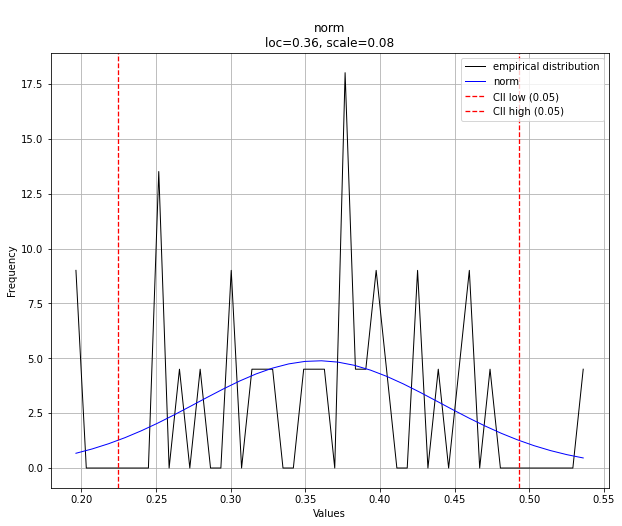

(array([3., 6., 6., 9., 7., 1.]),
 array([0.19280969, 0.25061287, 0.30841604, 0.36621921, 0.42402238,
        0.48182555, 0.53962872]),
 <BarContainer object of 6 artists>)

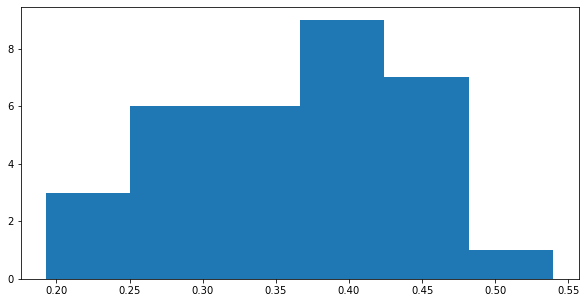

In [49]:
 from distfit import distfit
mumu = distfit(distr='norm')
mumu.fit_transform(mu)
mumu.plot()
plt.hist(mu, bins="auto")  

In [50]:
mumu.model

{'distr': <scipy.stats._continuous_distns.norm_gen at 0x7f85a6cdebb0>,
 'stats': 'RSS',
 'params': (0.3587438622212529, 0.08157864874970823),
 'name': 'norm',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f857623b820>,
 'score': 731.9632835345859,
 'loc': 0.3587438622212529,
 'scale': 0.08157864874970823,
 'arg': (),
 'CII_min_alpha': 0.22455892594349505,
 'CII_max_alpha': 0.4929287984990106}

# 6.4 Analyze trajectories
Trackpy includes several functions to help with some common analyses for particle trajectories. (See the "Static Analysis" and "Motion Analysis" sections of the API reference.)
Here, we can show that these data are consistent with colloidal particles undergoing Brownian motion in water.

# Mean Squared Displacement of Individual Probes
Compute the mean squared displacement (MSD) of each particle using the imsd function, and plot MSD vs. lag time.

In [51]:
im = tp.imsd(tm, 0.14, 3.15)  # microns per pixel = 0.07, frames per second = 15.54

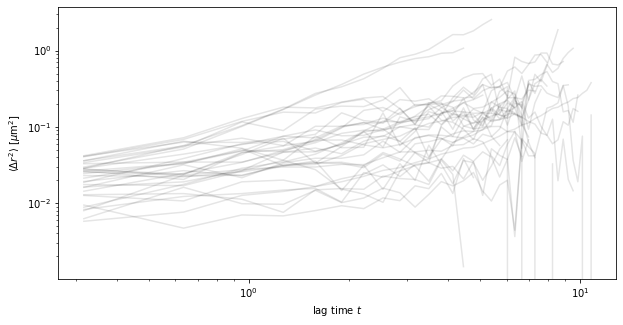

In [52]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

# Ensemble Mean Squared Displacement
Now use the emsd function to compute the ensemble mean squared displacement (EMSD) of all particles:

In [53]:
em = tp.emsd(tm, 0.14, 3.15)  # microns per pixel = 0.07, frames per second = 15.54

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

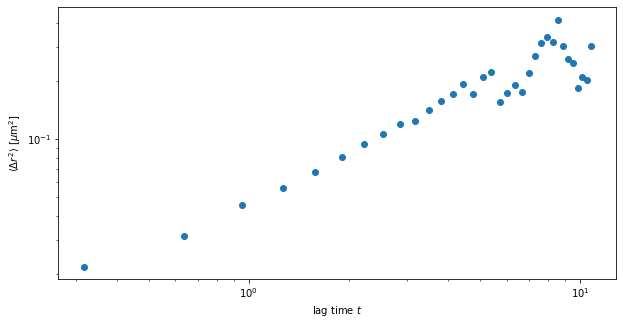

In [54]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#ax.set(ylim=(1e-2, 10));

We can easily fit this ensemble mean-squared displacement to a power law, $At^n$, using a convenience function, fit_powerlaw, which performs a linear regression in log space.

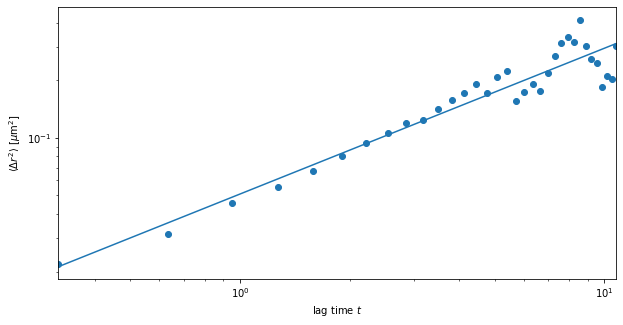

,n,A
msd,0.76224,0.050894


In [55]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]

$A \approx 1.66$ $\mu\textrm{m}^2 / \textrm{s}$

$A = 4D$